In [2]:
from ranx import Qrels, Run, evaluate
import bm25s
import Stemmer
from datasets import load_from_disk
from datasets import Dataset, DatasetDict
import numpy as np
import json
import pandas as pd
from collections import defaultdict
from typing import List, Dict
import random
import os
from src.utils.project_dirs import get_hfdata_dir

In [4]:
dataset_name = "Amzn_scientific_2018"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 10970
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 512
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 10970
    })
})

In [6]:
dataset_name = "sports"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 35597
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 35597
    })
})

In [7]:
dataset_name = "beauty"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 22363
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1118
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 22363
    })
})

In [8]:
dataset_name = "toys"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 19395
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 969
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 19395
    })
})

In [2]:
dataset_name = "beauty2014"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 22363
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1118
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 22363
    })
})

In [2]:
dataset_name = "toys"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 19395
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 969
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 19395
    })
})

In [10]:
dataset_name = "sports"
dataset_dict = load_from_disk(os.path.join(get_hfdata_dir(), dataset_name))
display(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['reviewer_id', 'text'],
        num_rows: 35597
    })
    validation: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 1779
    })
    test: Dataset({
        features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
        num_rows: 35597
    })
})

In [8]:
print(dataset_dict['train']['text'][2])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Vintage Pink Party Dress fits 18&quot; American Girl Dolls
Title: Cherry Dreams 18&quot; Dolls Pj and Slippers Fits American Girl
Title: Light Pink Glitter Shoes, Fits 18&quot; American Girl Dolls, Doll Accessories
Title: Lincoln Logs Classic Edition Tin

### Next item:
Title: Toysmith Kids Wooden Train Toy Whistle - Play Conductor Thomas


In [9]:
print(dataset_dict['test']['ptext'][2])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Vintage Pink Party Dress fits 18&quot; American Girl Dolls
Title: Cherry Dreams 18&quot; Dolls Pj and Slippers Fits American Girl
Title: Light Pink Glitter Shoes, Fits 18&quot; American Girl Dolls, Doll Accessories
Title: Lincoln Logs Classic Edition Tin
Title: Toysmith Kids Wooden Train Toy Whistle - Play Conductor Thomas

### Next item:



In [ ]:
print(dataset_dict['test']['text'][0])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Chutes and Ladders Super Hero Squad
Title: LeapFrog Letter Factory Phonics
Title: Crayola Art Smock-
Title: Crayola Giant Fingerpaint Paper, (99-3405)
Title: Gund Philbin 13&quot; Bear

### Next item:
Title: LeapFrog LeapPad2 Gel Skin - Blue(Works with LeapPad2 or LeapPad1)


In [5]:
print(dataset_dict['test']['ptext'][0])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Chutes and Ladders Super Hero Squad
Title: LeapFrog Letter Factory Phonics
Title: Crayola Art Smock-
Title: Crayola Giant Fingerpaint Paper, (99-3405)
Title: Gund Philbin 13&quot; Bear

### Next item:



In [6]:
print(dataset_dict['validation']['ptext'][0])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: Schoenhut 25-Key My First Piano II, Red
Title: Fascinations AntWorks Colors of Life
Title: Fisher-Price Little People Disney Princess Songs Palace
Title: Scrabble Crossword Game

### Next item:



In [9]:
print(dataset_dict['test']['seen_asins'][0], dataset_dict['test']['asin'][1])

['B007IY97U0', 'B00870XLDS', 'B008MIRO88', 'B00BQYYMN0', 'B00GRTQBTM'] B000052YQU


In [11]:
print(dataset_dict['train'][0]['text'])

Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). 
Each item is represented by the following format: Title: <item title> 
Based on this history, predict **only one** item the customer is most likely to purchase next in the same format.

### Purchase history:
Title: 63cm Long Zipper Beige+pink Wavy Cosplay Hair Wig Rw157
Title: MapofBeauty Long Wave Curly Hair Wig Full Wig for Women Long (Black)
Title: MapofBeauty Cosplay Costume Long Curly Hair Wig Ladies Synthetic Wigs (White)
Title: 32&quot; 80cm Long Hair Heat Resistant Spiral Curly Cosplay Wig (Red Dark)

### Next item:
Title: MapofBeauty 28&quot; 70cm Long Curly Hair Ends Costume Cosplay Wig (Brown)


## Cold start, normal and power

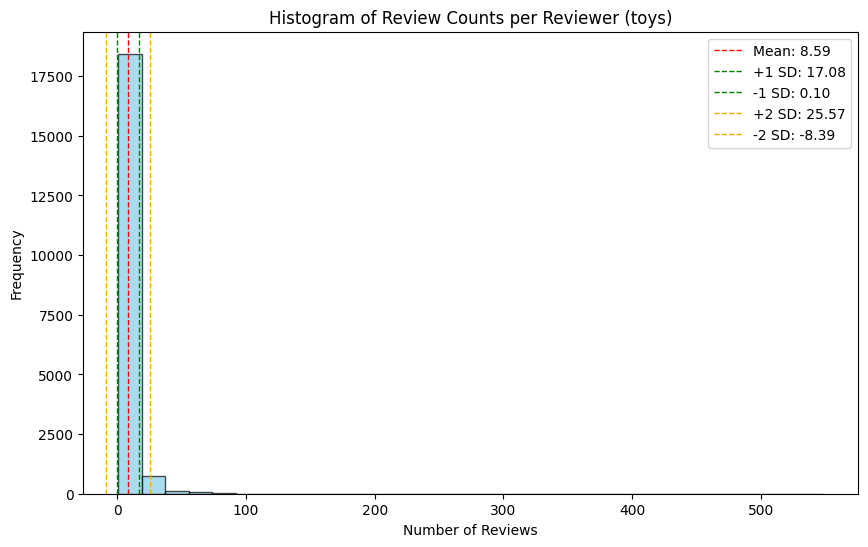

count    19406.000000
mean         8.593064
std          8.489433
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        548.000000
Name: count, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import argparse
from pathlib import Path
import urllib.parse

def visualize_reviewer_counts(df, category):
    """Visualizes the distribution of review counts per reviewer."""
    reviewer_counts = df['reviewerID'].value_counts()
    mean = reviewer_counts.mean()
    std = reviewer_counts.std()

    plt.figure(figsize=(10, 6))
    plt.hist(reviewer_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=1, label=f'+1 SD: {mean + std:.2f}')
    plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=1, label=f'-1 SD: {mean - std:.2f}')
    plt.axvline(mean + 2 * std, color='orange', linestyle='dashed', linewidth=1, label=f'+2 SD: {mean + 2 * std:.2f}')
    plt.axvline(mean - 2 * std, color='orange', linestyle='dashed', linewidth=1, label=f'-2 SD: {mean - 2 * std:.2f}')

    plt.title(f'Histogram of Review Counts per Reviewer ({category})')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    print(reviewer_counts.describe())

In [11]:
df = pd.read_json('../data/processed/beauty2014/df_dedup.json', lines=True)
reviewer_counts = df['reviewerID'].value_counts()
reviewer_counts.describe()

count    22363.000000
mean         8.870500
std          8.160898
min          4.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        204.000000
Name: count, dtype: float64

In [12]:
df = pd.read_json('../data/processed/sports2014/df_dedup.json', lines=True)
reviewer_counts = df['reviewerID'].value_counts()
reviewer_counts.describe()

count    35597.000000
mean         8.289772
std          6.052320
min          3.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        294.000000
Name: count, dtype: float64

In [13]:
df = pd.read_json('../data/processed/toys2014/df_dedup.json', lines=True)
reviewer_counts = df['reviewerID'].value_counts()
reviewer_counts.describe()

count    19406.000000
mean         8.593064
std          8.489433
min          1.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        548.000000
Name: count, dtype: float64

In [14]:
reviewer_counts

reviewerID
AJGU56YG8G1DQ     548
A1M8AYAL3L8ACP    168
A1II2ZRPKZAQQD    157
A2WW57XX2UVLM6    151
A1POFVVXUZR3IQ    133
                 ... 
A3W4D8XOGLWUN5      2
A2TCG2HV1VJP6V      2
A1L8YTICTVN5        1
AFV2584U13XP3       1
A1MHB1HRR6VPEH      1
Name: count, Length: 19406, dtype: int64